In [18]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [70]:
""" Problem Statement:
The objective of this project is to develop a machine learning model to predict the occurrence of heart failure based on various clinical features and compare the accuracies of different classification algorithms. The dataset consists of several attributes related to patients' health, including age, sex, blood pressure, serum creatinine levels, and more. By training and evaluating multiple models such as Logistic Regression, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN) Classifier, Decision Tree Classifier, Gaussian Naive Bayes (NB), and Random Forest Classifier, we aim to identify the most accurate and reliable model for predicting heart failure. Through this project, we strive to contribute to early detection and prevention of heart-related conditions using the power of machine learning."""

" Problem Statement:\nThe objective of this project is to develop a machine learning model to predict the occurrence of heart failure based on various clinical features and compare the accuracies of different classification algorithms. The dataset consists of several attributes related to patients' health, including age, sex, blood pressure, serum creatinine levels, and more. By training and evaluating multiple models such as Logistic Regression, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN) Classifier, Decision Tree Classifier, Gaussian Naive Bayes (NB), and Random Forest Classifier, we aim to identify the most accurate and reliable model for predicting heart failure. Through this project, we strive to contribute to early detection and prevention of heart-related conditions using the power of machine learning."

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [71]:
"""1. Importing and Exploring the dataset:"""

'1. Importing and Exploring the dataset:'

In [22]:
import os
print(os.getcwd())
data = pd.read_csv(r"C:\Users\dhvan\OneDrive\Desktop\HEALTHCARE\heart_failure_records_dataset.csv")


C:\Users\dhvan


In [21]:
type(data)

pandas.core.frame.DataFrame

In [23]:
data.shape

(299, 13)

In [24]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [25]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [26]:
#We split our dataset into two categories to make it easier for analysis

categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [27]:
type(categorical_variables)

pandas.core.frame.DataFrame

In [72]:
"""
Notes for categorical data:
Anaemia : 0 means that the person does not have anaemia, if 1 it does.

Diabetes : 0 means that the person does not have diabetes, if 1 it does.

High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.

Smoking : 0 means that the person does not smoke, if 1 it smokes.

Sex : 0 for female, 1 for male.

DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.
"""

'\nNotes for categorical data:\nAnaemia : 0 means that the person does not have anaemia, if 1 it does.\n\nDiabetes : 0 means that the person does not have diabetes, if 1 it does.\n\nHigh_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.\n\nSmoking : 0 means that the person does not smoke, if 1 it smokes.\n\nSex : 0 for female, 1 for male.\n\nDEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.\n'

In [28]:
pd.set_option('display.max_rows', 300)
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [29]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [30]:
"""
describe() function helps us with the descriptive statistics.
For example we have the minimum age is 40 and the maximum is 95 with a mean of 60.834,
for the same variable, we have the median is 60, standard deviation is 11.895 ...
"""

continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [31]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [74]:
""" 
Note:
Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because we have the total deaths(96) is less than half of the total persons that did not die because of heart failure (203).

Unbalanced data refers to a dataset where the distribution of classes is highly skewed, with one class being significantly more prevalent than the other(s). In the given dataset, the "DEATH_EVENT" variable has two classes: 0 and 1, indicating the occurrence or non-occurrence of a death event. The dataset contains 203 instances of class 0 (non-death events) and 96 instances of class 1 (death events).

Unbalanced data poses challenges for machine learning models as they tend to be biased towards the majority class, leading to poor performance in accurately predicting the minority class. To overcome this issue, several techniques can be employed:

Resampling Techniques: These techniques involve either oversampling the minority class (increasing the number of instances) or undersampling the majority class (reducing the number of instances). This helps in balancing the class distribution and can be done using methods like random oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or random undersampling.

Data Augmentation: This involves generating synthetic samples by applying transformations or modifications to the existing minority class instances. This helps in increasing the representation of the minority class and provides more diverse training examples for the model.

Ensemble Methods: Ensemble methods, such as Bagging or Boosting, combine multiple models to improve overall prediction performance. These methods can be particularly useful for unbalanced datasets as they can provide better generalization and handle class imbalance effectively.

Cost-Sensitive Learning: Assigning different misclassification costs to different classes during model training can help in addressing the class imbalance. By assigning a higher cost to misclassifying the minority class, the model is encouraged to pay more attention to it and improve its prediction performance.

Algorithmic Approaches: Some machine learning algorithms, like Support Vector Machines (SVM) or Decision Trees, have techniques specifically designed to handle imbalanced data. These algorithms can be customized with appropriate parameters or modifications to handle class imbalance more effectively.

By implementing these strategies, we can mitigate the challenges posed by unbalanced data and improve the model's ability to accurately predict the occurrence of death events in the given dataset.
"""

' \nNote:\nSince our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because we have the total deaths(96) is less than half of the total persons that did not die because of heart failure (203).\n\nUnbalanced data refers to a dataset where the distribution of classes is highly skewed, with one class being significantly more prevalent than the other(s). In the given dataset, the "DEATH_EVENT" variable has two classes: 0 and 1, indicating the occurrence or non-occurrence of a death event. The dataset contains 203 instances of class 0 (non-death events) and 96 instances of class 1 (death events).\n\nUnbalanced data poses challenges for machine learning models as they tend to be biased towards the majority class, leading to poor performance in accurately predicting the minority class. To overcome this issue, several techniques can be employed:\n\nResampling Techniques: These techniques involve either oversampling the minority cl

In [32]:
age = data[["age"]]
platelets = data[["platelets"]]

In [33]:
type(data[['age']])

pandas.core.frame.DataFrame

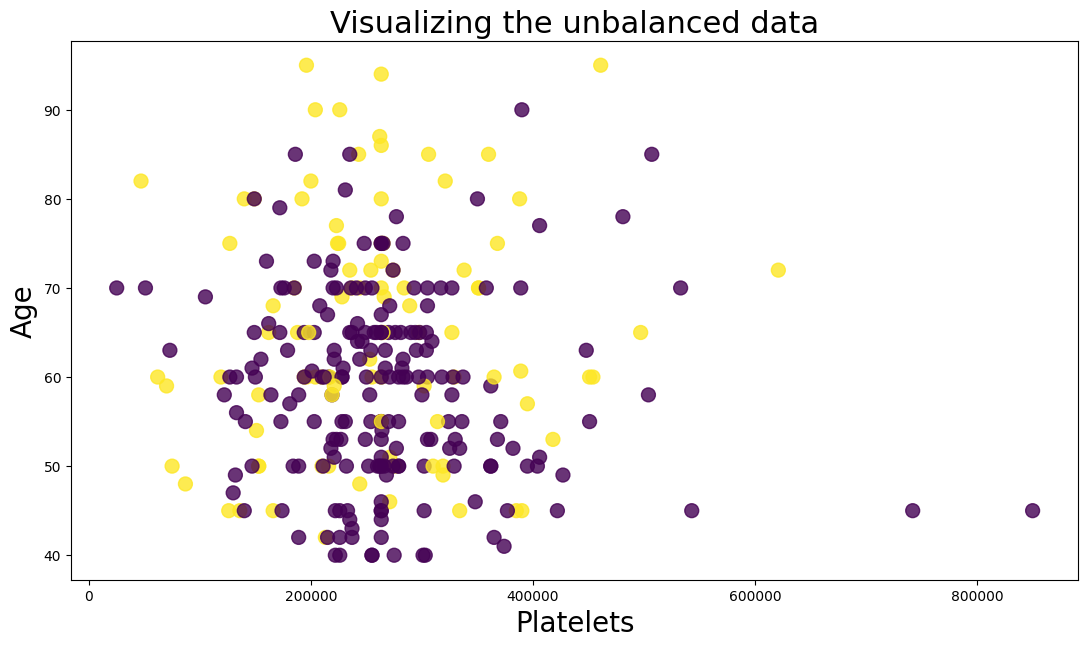

In [34]:
#Visualizing the unbalanced data with a scatter plot, the colors will depend on DEATH_EVENT (0 or 1)

plt.figure(figsize=(13,7))
plt.scatter(platelets, age, c = data["DEATH_EVENT"], s=100, alpha=0.8)
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

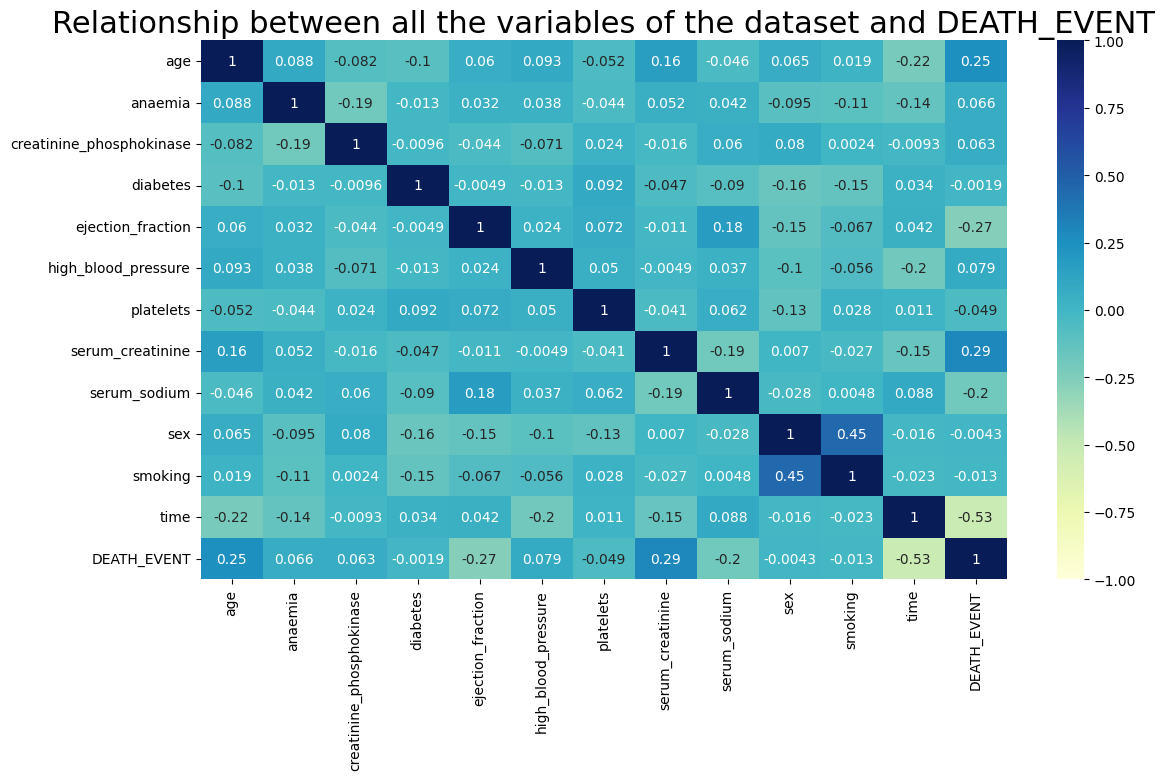

In [35]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()

In [36]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

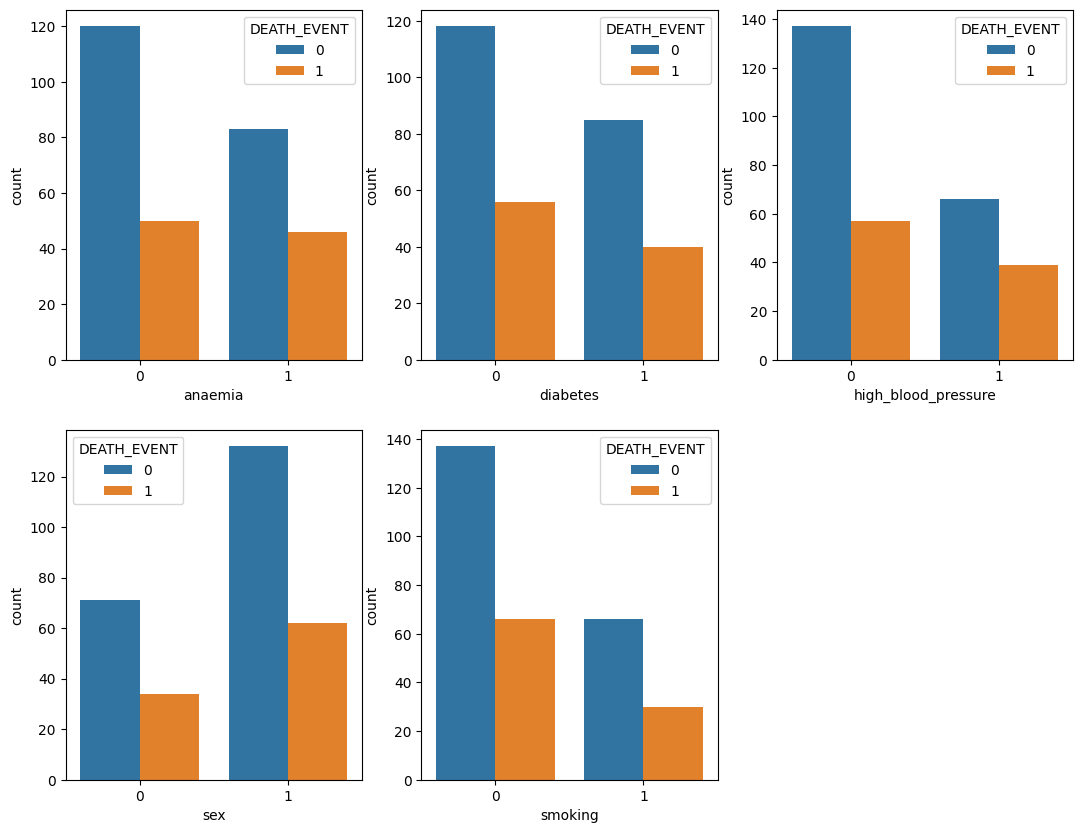

In [37]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

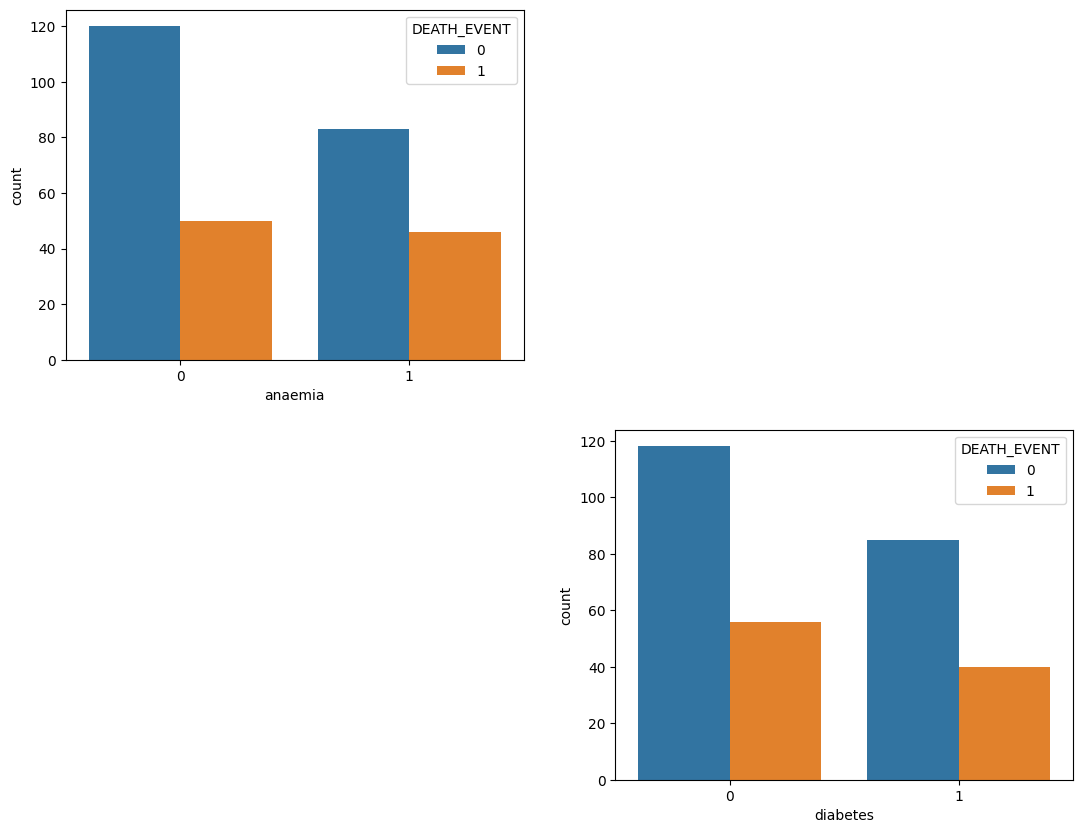

In [38]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= 'anaemia', hue = "DEATH_EVENT")
plt.subplot(2,2,4)
sns.countplot(data = data, x= 'diabetes', hue = "DEATH_EVENT")


In [39]:
for i,cat in enumerate(categorical_data):
    print(i, cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


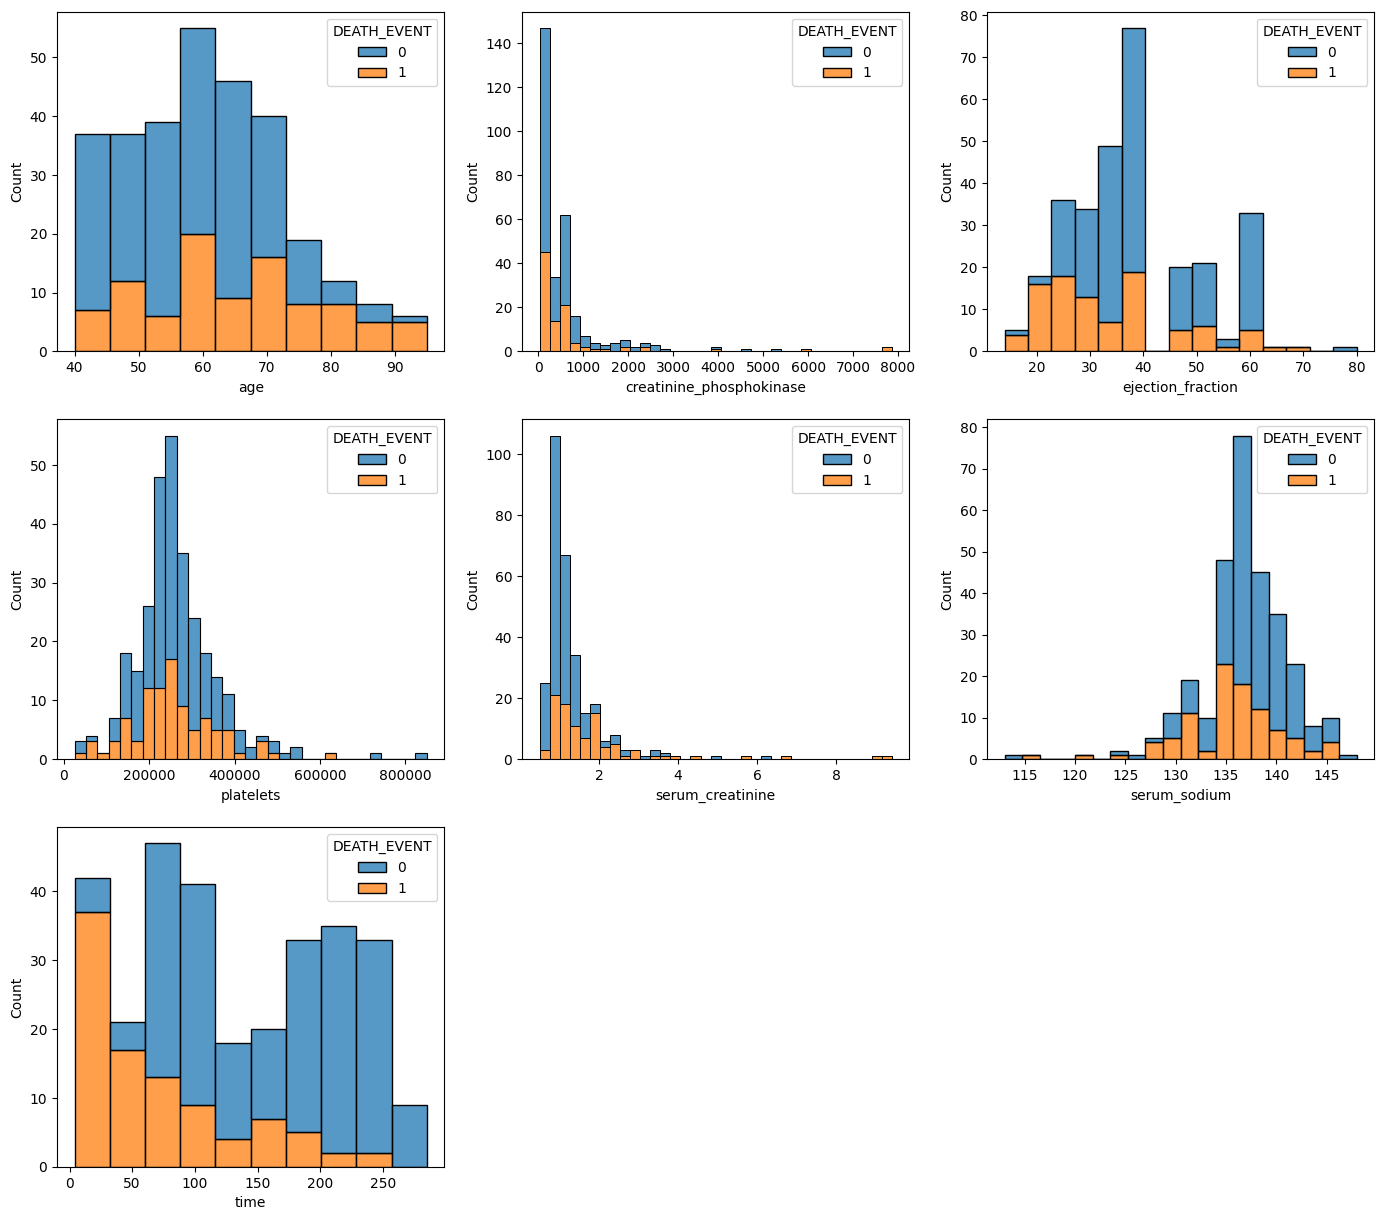

In [40]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

In [41]:
for i,cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


<Axes: xlabel='age', ylabel='Count'>

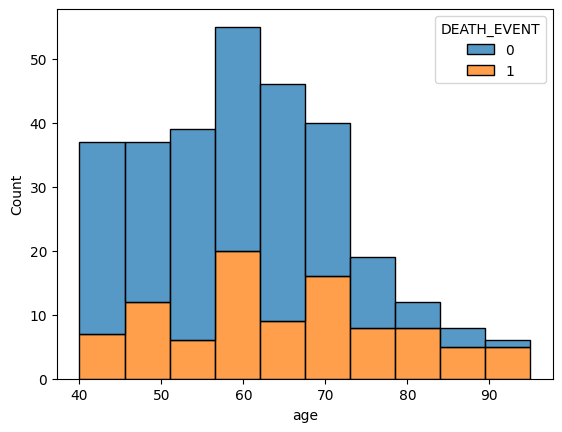

In [42]:
sns.histplot(data = data, x= 'age', hue = "DEATH_EVENT", multiple="stack")

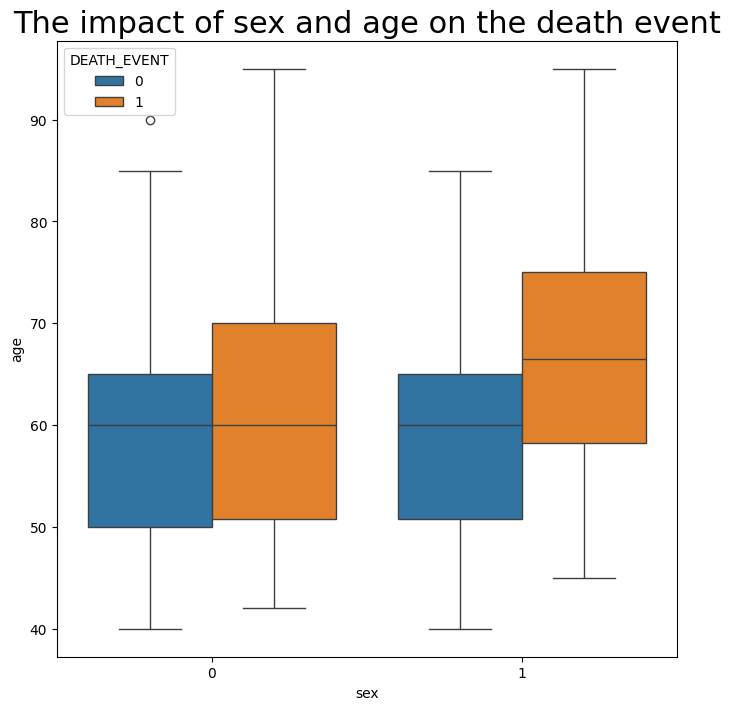

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the death event", fontsize=22)
plt.show()

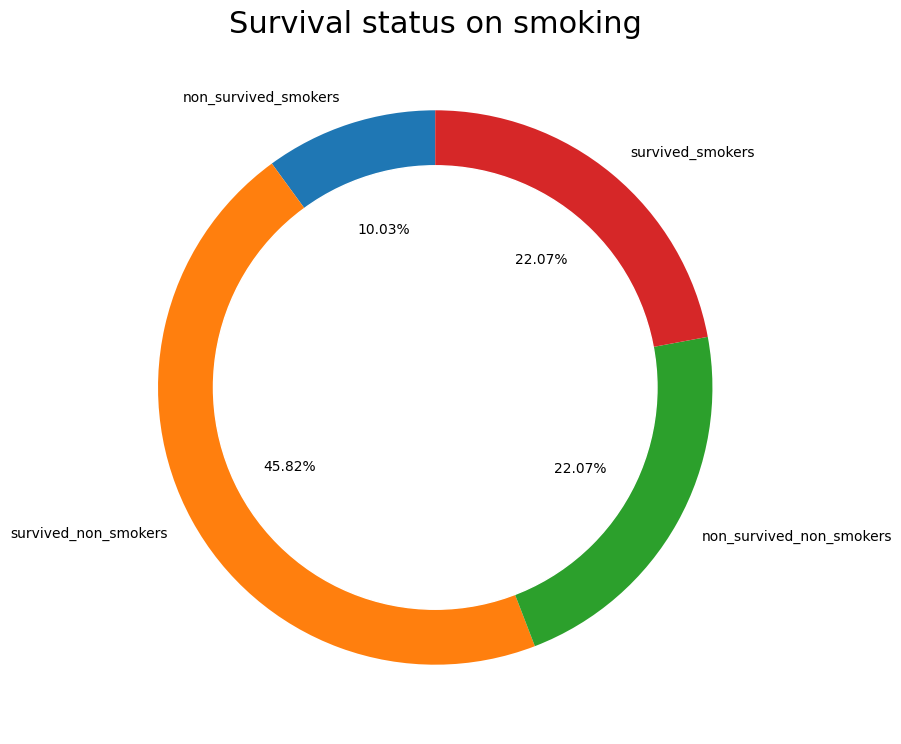

In [44]:
# Analyzing the survival status on smoking

smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()

([<matplotlib.patches.Wedge at 0x27aefdd5810>,
 [Text(-0.3410177745934297, 1.045804416423714, 'non_survived_smokers'),
  Text(-0.9658243170347182, -0.5264820876577098, 'survived_non_smokers'),
  Text(0.9602393154328239, -0.5366008359079417, 'non_survived_non_smokers'),
  Text(0.7031233830425759, 0.8459417877246419, 'survived_smokers')],
 [Text(-0.1860096952327798, 0.570438772594753, '10.0%'),
  Text(-0.5268132638371189, -0.2871720478132962, '45.8%'),
  Text(0.5237668993269948, -0.2926913650406955, '22.1%'),
  Text(0.3835218452959505, 0.4614227933043501, '22.1%')])

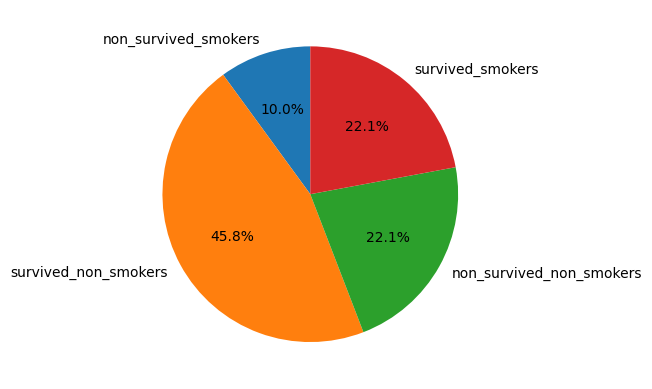

In [45]:
plt.pie(smoking_data, labels = smoking_labels, autopct='%.1f%%', startangle=90)

In [46]:
type(non_smokers)

pandas.core.frame.DataFrame

In [47]:
smokers[smokers["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


In [48]:
(len(non_survived_smokers)/299)*100

10.033444816053512

In [49]:
len(smokers[smokers["DEATH_EVENT"]==1])

30

In [50]:
smoking_data

[30, 137, 66, 66]

In [51]:
smoking_labels

['non_survived_smokers',
 'survived_non_smokers',
 'non_survived_non_smokers',
 'survived_smokers']

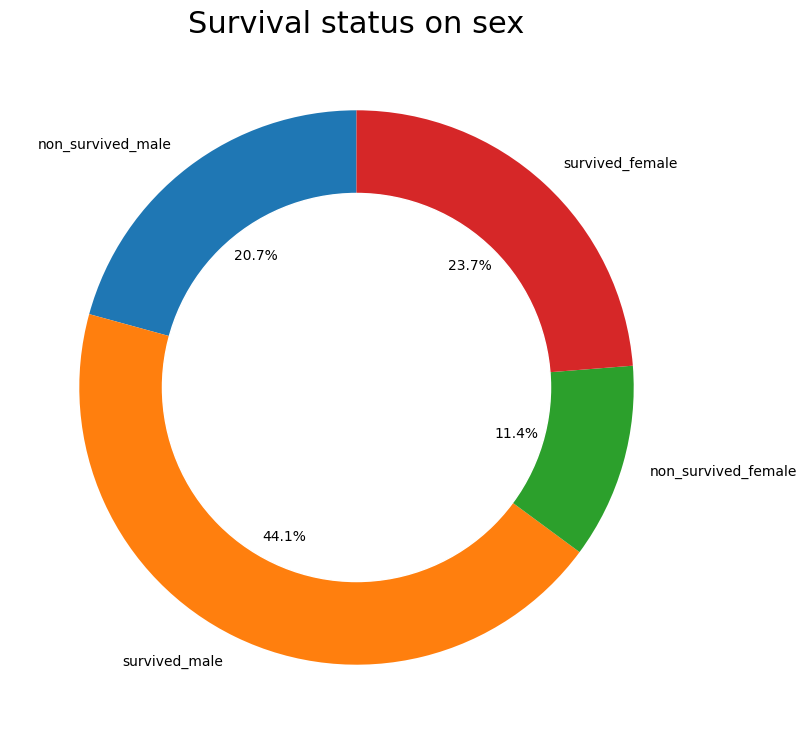

In [52]:
# Analyzing the survival status on sex

male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()

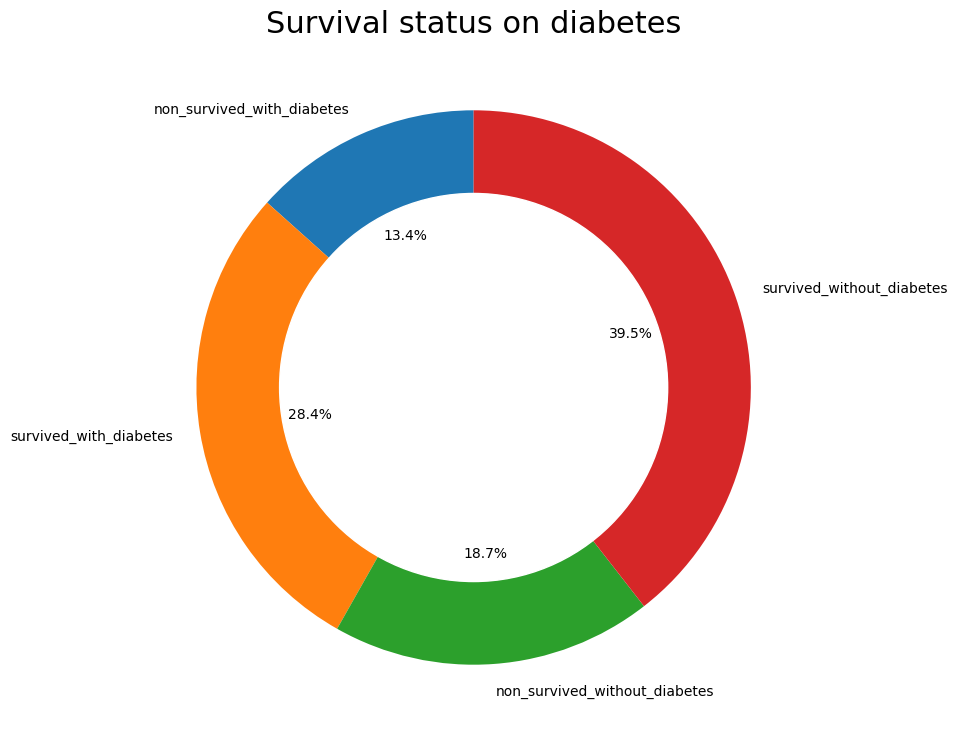

In [53]:
# Analyzing the survival status on diabetes

with_diabetes = data[data["diabetes"]==1]
without_diabetes = data[data["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), \
                 len(survived_without_diabetes)]
diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes",\
                   "survived_without_diabetes"]

plt.figure(figsize=(9,9))
plt.pie(diabetes_data, labels = diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

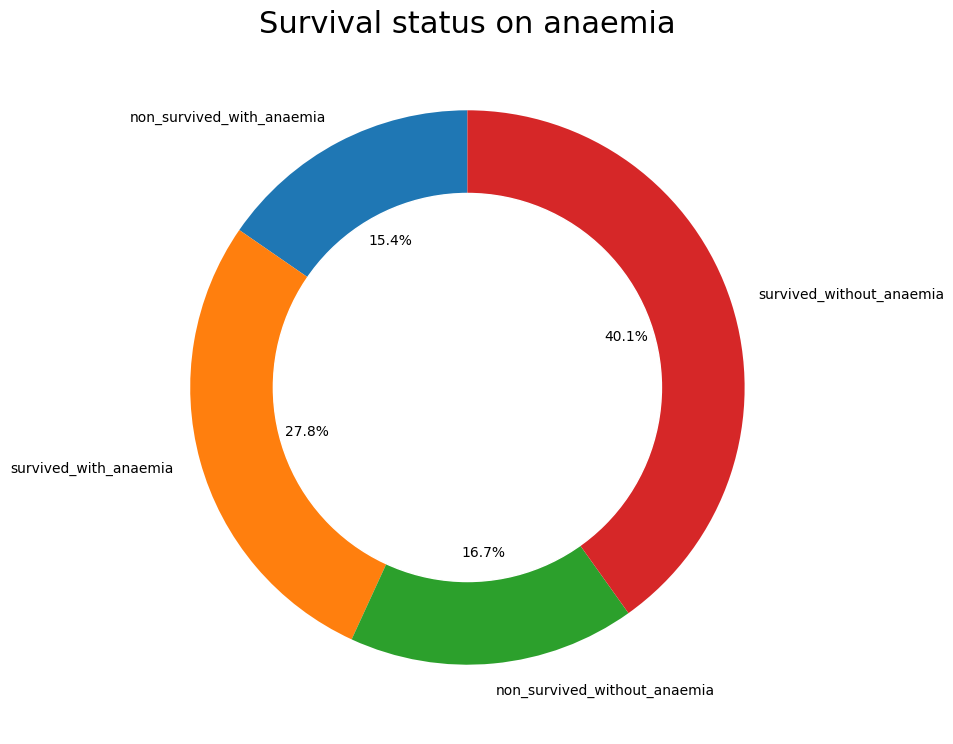

In [54]:
# Analyzing the survival status on anaemia

with_anaemia = data[data["anaemia"]==1]
without_anaemia = data[data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), \
                len(survived_without_anaemia)]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia",\
                  "survived_without_anaemia"]

plt.figure(figsize=(9,9))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

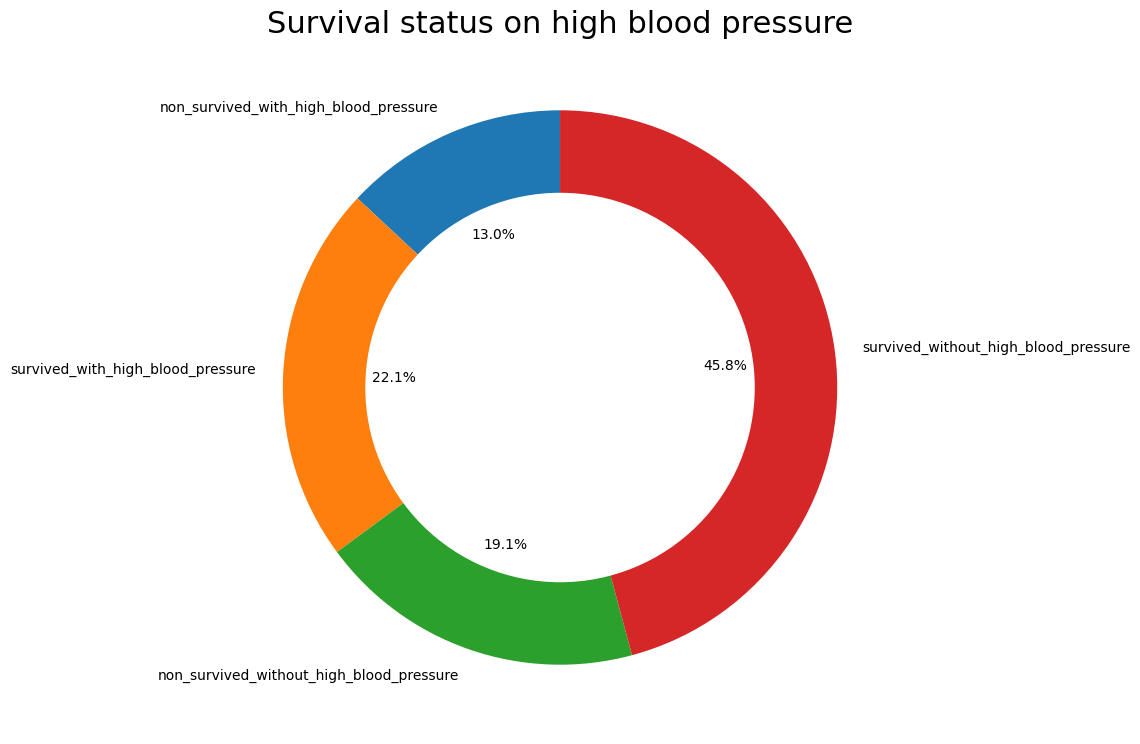

In [55]:
# Analyzing the survival status on high blood pressure

with_high_blood_pressure = data[data["high_blood_pressure"]==1]
without_high_blood_pressure = data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), \
                            len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

In [75]:
""" 3. Data modeling & prediction using continuous data: """

' 3. Data modeling & prediction using continuous data: '

In [56]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [58]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
 accuracy_list = [] # A list to save all the values from different models accuracy for comparaison using a bar chart

In [76]:
""" 
3.1 Logistic Regression
Logistic Regression is a statistical model used for binary classification problems, where the dependent variable or target variable is categorical with two possible outcomes. It is a linear model that predicts the probability of the occurrence of a particular event or outcome based on a set of independent variables.

In Logistic Regression, the input variables are combined linearly using weights or coefficients, and then passed through a sigmoid or logistic function. The sigmoid function maps the linear combination to a probability value between 0 and 1, representing the likelihood of the event occurring.
"""

' \n3.1 Logistic Regression\nLogistic Regression is a statistical model used for binary classification problems, where the dependent variable or target variable is categorical with two possible outcomes. It is a linear model that predicts the probability of the occurrence of a particular event or outcome based on a set of independent variables.\n\nIn Logistic Regression, the input variables are combined linearly using weights or coefficients, and then passed through a sigmoid or logistic function. The sigmoid function maps the linear combination to a probability value between 0 and 1, representing the likelihood of the event occurring.\n'

In [60]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(lr_accuracy)

In [77]:
""" 3.2 Support Vector Machine
Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It can handle both linear and non-linear decision boundaries by transforming the input data into a higher-dimensional feature space.

In SVM, the algorithm aims to find the optimal hyperplane that separates the classes with the maximum margin. The hyperplane is defined as the decision boundary that maximizes the distance between the nearest data points of different classes, known as support vectors.

The key idea behind SVM is to map the input data into a higher-dimensional space using a kernel function. By doing so, it becomes possible to find a hyperplane that effectively separates the classes, even when they are not linearly separable in the original feature space.

The SVM algorithm aims to minimize the classification error while maximizing the margin between the support vectors. It finds the optimal hyperplane by solving a convex optimization problem, considering the margin and the penalty for misclassified points.
"""

' 3.2 Support Vector Machine\nSupport Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It can handle both linear and non-linear decision boundaries by transforming the input data into a higher-dimensional feature space.\n\nIn SVM, the algorithm aims to find the optimal hyperplane that separates the classes with the maximum margin. The hyperplane is defined as the decision boundary that maximizes the distance between the nearest data points of different classes, known as support vectors.\n\nThe key idea behind SVM is to map the input data into a higher-dimensional space using a kernel function. By doing so, it becomes possible to find a hyperplane that effectively separates the classes, even when they are not linearly separable in the original feature space.\n\nThe SVM algorithm aims to minimize the classification error while maximizing the margin between the support vectors. It finds the optimal hyperplane by solving

In [61]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)

In [78]:
"""
3.3 KNearestNeighbor:
The K Nearest Neighbors (KNN) algorithm is a simple yet effective supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric algorithm that makes predictions based on the similarity of a new data point to its k nearest neighbors in the training dataset.

In KNN, the algorithm stores the entire training dataset as the model. When a new data point needs to be classified, the algorithm calculates the distances between the new point and all the points in the training dataset. The k nearest neighbors of the new point are then identified based on the calculated distances.

For classification tasks, KNN assigns the class label to the new point based on the majority class among its k nearest neighbors. In regression tasks, KNN predicts the value of the new point based on the average or weighted average of the values of its k nearest neighbors.

The choice of the value of k is an important aspect of the KNN algorithm. A smaller value of k leads to a more flexible decision boundary, but it can be sensitive to noise. On the other hand, a larger value of k results in a smoother decision boundary but may overlook local patterns.

KNN is a versatile algorithm that can handle both binary and multi-class classification tasks, as well as regression tasks. It does not make any assumptions about the underlying data distribution, making it applicable to a wide range of problem domains.
However, KNN has some limitations. It can be computationally expensive, especially for large datasets, as it requires calculating distances to all training points. It is also sensitive to the choice of distance metric and the presence of irrelevant or noisy features. Proper data preprocessing and feature scaling are crucial for the performance of KNN.

Overall, KNN is a simple and intuitive algorithm that can be effective in many scenarios, particularly when the decision boundaries are complex or non-linear. It is often used as a baseline algorithm and can provide good initial results before exploring more advanced techniques.
"""

'\n3.3 KNearestNeighbor:\nThe K Nearest Neighbors (KNN) algorithm is a simple yet effective supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric algorithm that makes predictions based on the similarity of a new data point to its k nearest neighbors in the training dataset.\n\nIn KNN, the algorithm stores the entire training dataset as the model. When a new data point needs to be classified, the algorithm calculates the distances between the new point and all the points in the training dataset. The k nearest neighbors of the new point are then identified based on the calculated distances.\n\nFor classification tasks, KNN assigns the class label to the new point based on the majority class among its k nearest neighbors. In regression tasks, KNN predicts the value of the new point based on the average or weighted average of the values of its k nearest neighbors.\n\nThe choice of the value of k is an important aspect of the KNN algorith

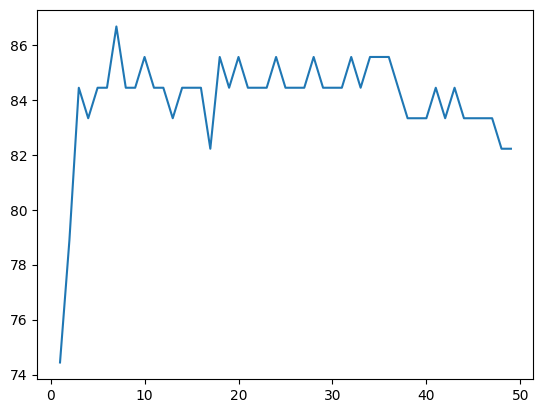

In [62]:
# We use this program to find the optimal value of k
knn_list = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(knn_accuracy)

In [79]:
""" 3.4 Decison Tree Classifier
The Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It builds a tree-like model of decisions and their possible consequences based on features present in the training data.

The decision tree starts with a root node that represents the entire dataset. At each internal node, the algorithm chooses the best feature to split the data based on certain criteria, such as Gini impurity or information gain. The data is then partitioned into subsets based on the selected feature. This process is repeated recursively for each subset until a stopping criterion is met, such as reaching a maximum depth or having a minimum number of samples at a node.

The decision tree model can be visualized as a flowchart-like structure, where each internal node represents a decision based on a feature, each branch represents a possible outcome of that decision, and each leaf node represents a class label or a predicted value.

During the training phase, the decision tree learns to classify instances by making decisions based on the values of the features. In the case of classification tasks, the leaf nodes represent the class labels assigned to the instances that reach them. In regression tasks, the leaf nodes contain predicted continuous values.

Decision trees have several advantages. They are easy to understand and interpret, as the flowchart-like structure provides clear insights into the decision-making process. Decision trees can handle both categorical and numerical features, and they can capture non-linear relationships between features and the target variable. They are also robust to outliers and missing values in the data.
However, decision trees are prone to overfitting, especially if they are allowed to grow to full depth. Overfitting occurs when the tree becomes too specific to the training data and fails to generalize well to unseen data. To mitigate overfitting, techniques such as pruning, setting a maximum depth, or using ensemble methods like Random Forest can be applied.

In conclusion, decision tree classifiers are versatile and interpretable models that can be used for both binary and multi-class classification tasks. They are particularly useful when the decision boundaries are non-linear and can provide valuable insights into the decision-making process. However, care should be taken to prevent overfitting and to optimize the model's hyperparameters for better performance.
"""

" 3.4 Decison Tree Classifier\nThe Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It builds a tree-like model of decisions and their possible consequences based on features present in the training data.\n\nThe decision tree starts with a root node that represents the entire dataset. At each internal node, the algorithm chooses the best feature to split the data based on certain criteria, such as Gini impurity or information gain. The data is then partitioned into subsets based on the selected feature. This process is repeated recursively for each subset until a stopping criterion is met, such as reaching a maximum depth or having a minimum number of samples at a node.\n\nThe decision tree model can be visualized as a flowchart-like structure, where each internal node represents a decision based on a feature, each branch represents a possible outcome of that decision, and each leaf node represents a class label or a predicted value.\n\

In [64]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

In [80]:
""" 
3.5 Naive Bayes
The Naive Bayes model is a probabilistic machine learning algorithm based on Bayes' theorem with an assumption of independence between features. It is commonly used for classification tasks, particularly in natural language processing and text mining applications.

The Naive Bayes algorithm calculates the probability of an instance belonging to a particular class based on the observed features. It assumes that the presence of a particular feature in a class is independent of the presence of other features. This assumption simplifies the calculation of probabilities and allows for efficient and scalable training and prediction.

The model works by estimating the prior probabilities of each class based on the frequencies of the classes in the training data. It also estimates the conditional probabilities of each feature given the class. These probabilities are then used to calculate the posterior probability of each class given the observed features using Bayes' theorem. The class with the highest posterior probability is assigned as the predicted class for a given instance.

One of the key advantages of the Naive Bayes model is its simplicity and computational efficiency. It can handle high-dimensional data with a large number of features and can be trained quickly even with large datasets. Naive Bayes is also robust to irrelevant features and can handle missing values in the data.
However, the Naive Bayes model relies on the assumption of feature independence, which may not hold true in many real-world scenarios. This assumption can lead to suboptimal performance when there are strong dependencies among features. Additionally, Naive Bayes can be sensitive to the presence of rare events or outliers in the data.

Despite its simplifying assumptions, Naive Bayes has shown competitive performance in various text classification tasks, such as spam filtering, sentiment analysis, and document categorization. It is particularly useful when dealing with high-dimensional text data and can provide fast and reliable predictions.
"""

" \n3.5 Naive Bayes\nThe Naive Bayes model is a probabilistic machine learning algorithm based on Bayes' theorem with an assumption of independence between features. It is commonly used for classification tasks, particularly in natural language processing and text mining applications.\n\nThe Naive Bayes algorithm calculates the probability of an instance belonging to a particular class based on the observed features. It assumes that the presence of a particular feature in a class is independent of the presence of other features. This assumption simplifies the calculation of probabilities and allows for efficient and scalable training and prediction.\n\nThe model works by estimating the prior probabilities of each class based on the frequencies of the classes in the training data. It also estimates the conditional probabilities of each feature given the class. These probabilities are then used to calculate the posterior probability of each class given the observed features using Bayes' 

In [65]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)

In [81]:
""" 
3.6 Random Forest Classifier
The Random Forest Classifier is an ensemble learning method that combines multiple decision trees to create a powerful predictive model. It is a versatile and widely used algorithm for both classification and regression tasks.

The Random Forest model builds an ensemble of decision trees, where each tree is trained on a different subset of the training data and uses a random subset of features for making split decisions. This randomization helps to introduce diversity among the trees and reduces the risk of overfitting, leading to a more robust and accurate model.

The training process of the Random Forest involves creating a large number of decision trees. Each tree is built using a random subset of the training data through a process called bootstrapping, where samples are drawn with replacement. Additionally, for each split in the tree, only a subset of features is considered, further enhancing the randomness of the model.

During prediction, each tree in the Random Forest independently classifies the input data, and the final prediction is determined by a majority vote or averaging the predictions of all the trees. This aggregation of predictions from multiple trees helps to improve the model's accuracy, generalization, and robustness.

Random Forests have several advantages over individual decision trees. They can handle high-dimensional data with a large number of features and are resistant to overfitting. They are also capable of capturing complex relationships and interactions between features. Random Forests are less sensitive to noisy data and outliers, making them more reliable in real-world sce
Furthermore, Random Forests provide useful measures of feature importance, indicating the relative contribution of each feature to the model's predictive performance. This information can help in understanding the data and feature selection processes.

However, Random Forests can be computationally expensive, especially when dealing with a large number of trees and features. They may also be less interpretable than individual decision trees due to the complexity of the ensemble. Additionally, Random Forests may not perform well on datasets with highly imbalanced class distributions or when there are strong dependencies between features.

It is widely used in various domains, including finance, healthcare, and image recognition, where high-dimensional data and complex relationships need to be modeled effectively.
"""

" \n3.6 Random Forest Classifier\nThe Random Forest Classifier is an ensemble learning method that combines multiple decision trees to create a powerful predictive model. It is a versatile and widely used algorithm for both classification and regression tasks.\n\nThe Random Forest model builds an ensemble of decision trees, where each tree is trained on a different subset of the training data and uses a random subset of features for making split decisions. This randomization helps to introduce diversity among the trees and reduces the risk of overfitting, leading to a more robust and accurate model.\n\nThe training process of the Random Forest involves creating a large number of decision trees. Each tree is built using a random subset of the training data through a process called bootstrapping, where samples are drawn with replacement. Additionally, for each split in the tree, only a subset of features is considered, further enhancing the randomness of the model.\n\nDuring prediction, 

In [66]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

In [67]:
accuracy_list

[87.78, 84.44, 84.44, 88.89, 82.22, 85.56]

In [68]:
models = ["Logistic Regression","SVC","KNearestNeighbors","Decision Tree","Naive Bayes","Random Forest"]

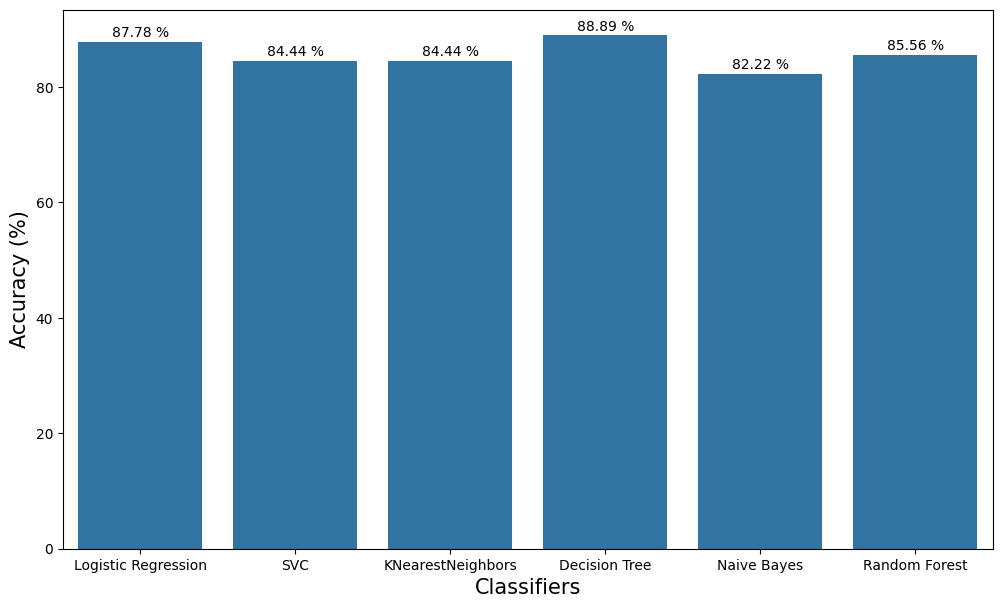

In [69]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

In [82]:
"""
Conclusion:
From the above accuracy values, we can observe that the Decision Tree model achieved the highest accuracy of 88.89%, closely followed by Logistic Regression with an accuracy of 87.78%. These two models outperformed the other models in terms of prediction accuracy.

Considering the performance metrics, the Decision Tree model stands out due to its high accuracy and its ability to capture complex relationships in the data. Decision trees are known for their interpretability, as they can easily represent decision rules based on the provided features. This can be advantageous in understanding the factors that contribute to the prediction of heart failure.

On the other hand, Logistic Regression also achieved a high accuracy rate and has the advantage of providing probabilistic interpretations of predictions. It can estimate the probability of an event occurring, which can be valuable in assessing the risk of heart failure.

While the other models (SVC, KNearestNeighbors, Naive Bayes, and Random Forest) performed reasonably well, they had slightly lower accuracies compared to the top two models. However, the suitability of a model may also depend on other factors such as interpretability, computational efficiency, and specific requirements of the problem at hand.
In summary, both the Decision Tree and Logistic Regression models exhibit strong performance in predicting heart failure. The Decision Tree model's ability to handle complex relationships and the interpretability of its decision rules make it a compelling choice. Meanwhile, Logistic Regression provides a probabilistic interpretation and can be useful in estimating the risk of heart failure. The final selection between the two models would depend on the specific needs, interpretability requirements, and constraints of the project.
"""

"\nConclusion:\nFrom the above accuracy values, we can observe that the Decision Tree model achieved the highest accuracy of 88.89%, closely followed by Logistic Regression with an accuracy of 87.78%. These two models outperformed the other models in terms of prediction accuracy.\n\nConsidering the performance metrics, the Decision Tree model stands out due to its high accuracy and its ability to capture complex relationships in the data. Decision trees are known for their interpretability, as they can easily represent decision rules based on the provided features. This can be advantageous in understanding the factors that contribute to the prediction of heart failure.\n\nOn the other hand, Logistic Regression also achieved a high accuracy rate and has the advantage of providing probabilistic interpretations of predictions. It can estimate the probability of an event occurring, which can be valuable in assessing the risk of heart failure.\n\nWhile the other models (SVC, KNearestNeighbo